In [ ]:
import os
import random
import numpy as np
from shutil import copyfile
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pathlib
from pathlib import Path
from keras import Model, layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
import keras.backend as K
K.set_image_data_format('channels_last')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from tensorflow import keras
import tensorflow as tf
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D

In [ ]:
import os #  Kaggle credentials

os.environ['KAGGLE_USERNAME'] = "username" # username
os.environ['KAGGLE_KEY'] = "111" # key 

In [ ]:
!kaggle datasets download -d whenamancodes/wild-animals-images # Downloading data from Kaggle

Dataset URL: https://www.kaggle.com/datasets/whenamancodes/wild-animals-images
License(s): CC0-1.0
 99% 0.98G/0.98G [00:11<00:00, 114MB/s]
100% 0.98G/0.98G [00:11<00:00, 88.2MB/s]


In [ ]:
!unzip "./wild-animals-images.zip" -d "./data" #Extracting the data

Streaming output truncated to the last 5000 lines.
  inflating: ./data/cheetah-resize-224/resize-224/00000236_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000239_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000240_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000242_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000244_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000245_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000246_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000247_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000248_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000250_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000251_224resized.png  
  inflating: ./data/cheetah-resize-224/resize-224/00000252_224resized.png  
  inflating: ./data/cheetah-resize-22

In [ ]:
#Selecting the folders cinsisting images of size 224x224x3
Classes = []
for class_item in os.listdir('./data'):
  if("224" in class_item):
    Classes.append(class_item.replace("-resize-224",""))
Classes.sort()
print("Classes :-",Classes)
path, dirs, files = next(os.walk("./data"))

Classes :- ['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


In [ ]:
path_root = './data/'
new_directory = './test'
os.mkdir(new_directory)  # creating the new directory (test directory)
train_path = os.path.join(new_directory, 'train')
os.mkdir(train_path)

# Data Cleaning and Splitting

In [ ]:
def split_data(Class_name,size):
    if(Class_name.strip("-resize-"+str(size)) in ['hyena','cheetah']):
      Source_path=path_root+Class_name+"-resize-"+str(size)+"/resize-"+str(size)+"/"
    else:
      Source_path=path_root+Class_name+"-resize-"+str(size)+"/"+Class_name +"-resize-"+str(size)+"/" #resize-"+str(size)+"/"
    print(Source_path)
    train_directory_path=train_path+"/"+Class_name.split("-")[0]+"/"
    os.mkdir(train_directory_path)
    file_list = []
    for filename in os.listdir(Source_path):
        file = Source_path + filename
        if os.path.getsize(file) > 0:
            file_list.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    train_len_size = int(len(file_list) * 0.8)
    validation_len_size= train_len_size + int(len(file_list) * 0)
    randomized_set = random.sample(file_list, len(file_list))

    training_set = randomized_set[0:train_len_size]
    valid_set = randomized_set[train_len_size:validation_len_size]
    test_set= randomized_set[validation_len_size:]

    for filename in training_set:
        this_file = Source_path + filename
        destination = train_directory_path + filename
        copyfile(this_file, destination)

    testlist=[]
    for filename in test_set:
      destination = Source_path + filename
      testlist.append(destination)

    #Writing the testing images path to a file
    f = open("test_file.txt", "a")
    string=""
    for _ in testlist:
      string+=''.join(map(str,_))+"\n"
    f.write(string)
    f.close()

In [ ]:
#Extracting data from the main root folder and splitting the data into train and test
for i in Classes:
  split_data(i,224)

./data/cheetah-resize-224/resize-224/
00000244_224resized.png is zero length, so ignoring.
./data/fox-resize-224/fox-resize-224/
./data/hyena-resize-224/resize-224/
00000224_224resized.png is zero length, so ignoring.
./data/lion-resize-224/lion-resize-224/
./data/tiger-resize-224/tiger-resize-224/
./data/wolf-resize-224/wolf-resize-224/


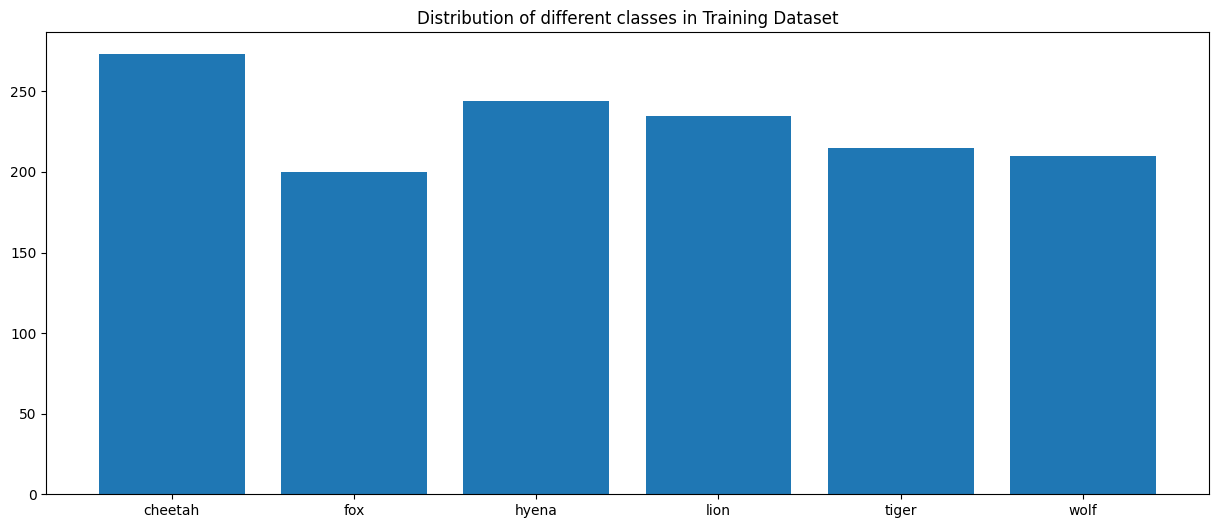

In [ ]:
image_folder = Classes  # Displaying the distribution of image data in each class
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('./test/train/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(15, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [ ]:
for i in image_folder: # Checking the training dataset
    print('Training',i,'images are: ',str(len(os.listdir('./test/train/'+i+'/'))))

Training cheetah images are:  273
Training fox images are:  200
Training hyena images are:  244
Training lion images are:  235
Training tiger images are:  215
Training wolf images are:  210


# Data Augumentation

In [ ]:
img_width= # Defining the dimensions of the images and the batch size
img_height=224
batch_size=32

In [ ]:
# Configuring the ImageDataGenerator for data augmentation and preprocessing
data_Generator = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=33,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                    validation_split=0.2)

# Generating batches of training data from the specified directory
train_input = data_Generator.flow_from_directory(train_path,
                                                    batch_size=batch_size,
                                                 subset="training",
                                                 color_mode="rgb",
                                                    class_mode='categorical',
                                                    target_size=(224,224),
                                                 shuffle=True)

# Generating batches of validation data from the specified directory
validation_input = data_Generator.flow_from_directory(train_path,
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    color_mode="rgb",
                                                    class_mode='categorical',
                                                    target_size=(224,224),
                                                 shuffle=True)

Found 1103 images belonging to 6 classes.
Found 274 images belonging to 6 classes.


In [ ]:
x,y = next(train_input)
x.shape

(32, 224, 224, 3)

In [ ]:
y.shape

(32, 6)

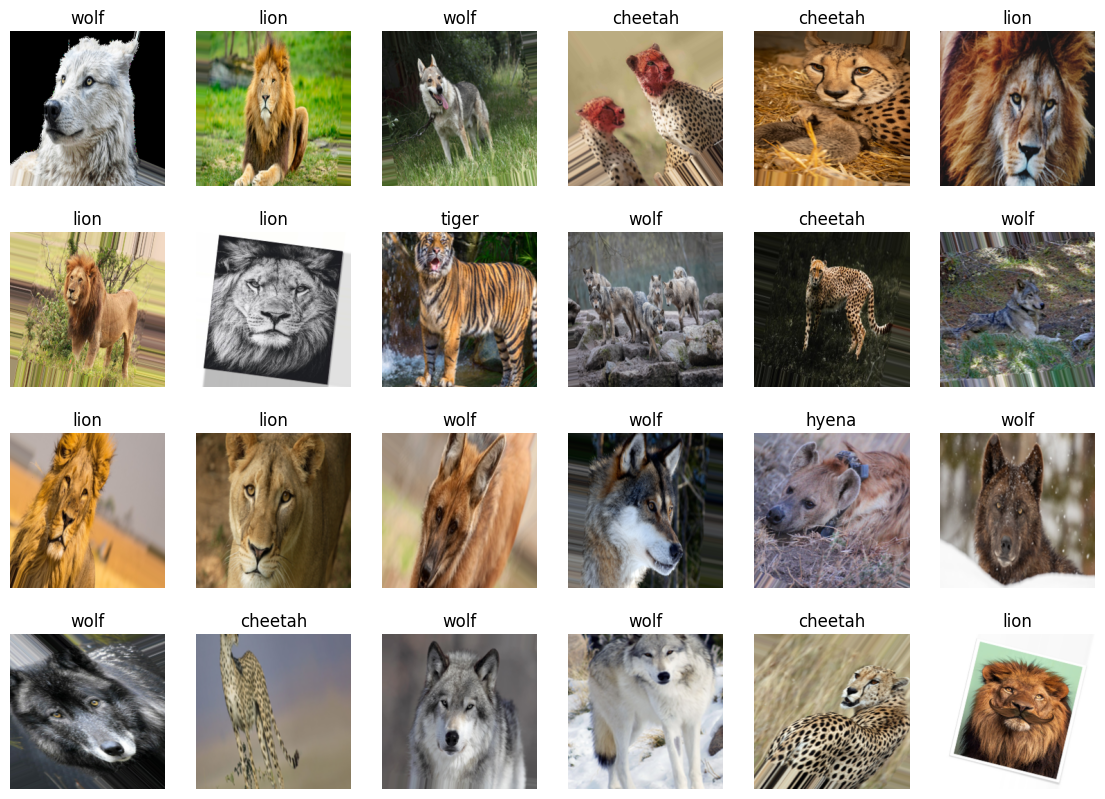

In [ ]:
# Displaying the images
def plot_images(img, labels):
    plt.figure(figsize=[14, 10])
    for i in range(24):
        plt.subplot(4, 6, i+1)
        plt.imshow(img[i])
        plt.title(Classes[np.argmax(labels[i])])
        plt.axis('off')
plot_images(x,y)

# Using InceptionResnetV2 Model

---



In [ ]:
import tensorflow as tf
base_InceptionResNetV2_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
base_InceptionResNetV2_model.trainable=False
InceptionResNetV2_model = tf.keras.Sequential([
        base_InceptionResNetV2_model,
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
    ])

InceptionResNetV2_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
InceptionResNetV2_model.summary()

219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 batch_normalization_203 (B  (None, 5, 5, 1536)        10752     
 atchNormalization)                                              
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dense_1 (Dense)             (None, 256)               

# Training

In [ ]:
early_stopping_call_back = tf.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [ ]:
batch_size=32
STEP_SIZE_TRAIN = train_input.n//train_input.batch_size
STEP_SIZE_VALID = validation_input.n//validation_input.batch_size

InceptionResNetV2_history = InceptionResNetV2_model.fit(train_input,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_input,
                    validation_steps=STEP_SIZE_VALID,
                    callbacks=[early_stopping_call_back],
                    epochs=11) # For 11 epochs

Epoch 1/11
34/34 [==============================] - 46s 780ms/step - loss: 0.4093 - accuracy: 0.8898 - val_loss: 0.1406 - val_accuracy: 0.9570
Epoch 2/11
34/34 [==============================] - 22s 634ms/step - loss: 0.1301 - accuracy: 0.9645 - val_loss: 0.0830 - val_accuracy: 0.9805
Epoch 3/11
34/34 [==============================] - 26s 779ms/step - loss: 0.0981 - accuracy: 0.9720 - val_loss: 0.0619 - val_accuracy: 0.9727
Epoch 4/11
34/34 [==============================] - 21s 619ms/step - loss: 0.0839 - accuracy: 0.9729 - val_loss: 0.0924 - val_accuracy: 0.9766
Epoch 5/11
34/34 [==============================] - 20s 590ms/step - loss: 0.0589 - accuracy: 0.9813 - val_loss: 0.0862 - val_accuracy: 0.9727
Epoch 6/11
34/34 [==============================] - 22s 631ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.1308 - val_accuracy: 0.9766
Epoch 7/11
34/34 [==============================] - 22s 647ms/step - loss: 0.0615 - accuracy: 0.9841 - val_loss: 0.0472 - val_accuracy: 0.9883

# Metrics & Results

In [ ]:
def get_graphs(history):
  # storing results
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']


  # plotting results
  # accuracy
  plt.figure(figsize=(10, 16))
  plt.rcParams['figure.figsize'] = [16, 9]
  plt.rcParams['font.size'] = 14
  plt.rcParams['axes.grid'] = True
  plt.rcParams['figure.facecolor'] = 'white'
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.title(f'\nTraining and Validation Accuracy. \n    Train Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

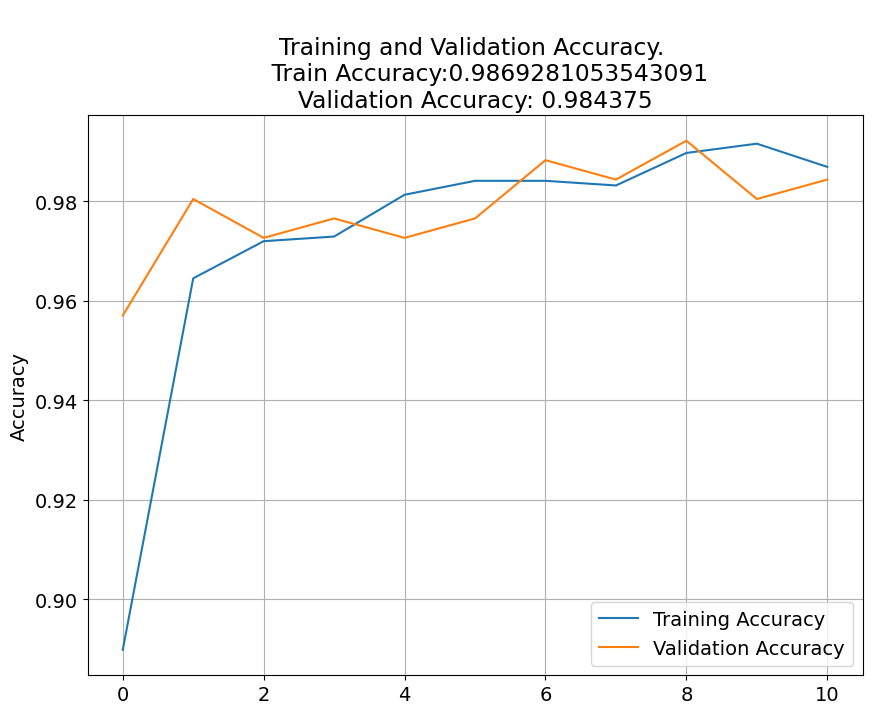

In [ ]:
get_graphs(InceptionResNetV2_history)

In [ ]:
def read_file(file_name):
  read_file=open(file_name,"r")
  full_file_content=read_file.readlines()
  arr_list=[]
  for line in full_file_content:
    arr_list.append(line.strip())
  read_file.close()
  return arr_list

def preprocess_image_file(file_path):
    img = load_img(file_path, target_size = (224,224))
    arr = img_to_array(img)
    arr = np.expand_dims(arr, axis = 0)
    arr /= 255.
    return arr

def preprocess_image(img):
    # img = load_img(file_path, target_size = (224,224))
    img=img.resize((224,224))
    arr = img_to_array(img)
    arr = np.expand_dims(arr, axis = 0)
    arr /= 255.
    return arr


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay ,f1_score,accuracy_score,precision_score,recall_score

def predict_model(model1):
  predictions = []
  input_arr=read_file("test_file.txt")
  random.shuffle(input_arr)
  test_preprocessed_images = np.vstack([preprocess_image_file(fn) for fn in input_arr])
  array = model1.predict(test_preprocessed_images, batch_size=1, verbose=1)
  output = np.argmax(array, axis=1)

  cnt=0
  totcnt=0
  y=[]
  for i in range(len(input_arr)):
    pred=input_arr[i].split("/")[2].split("-")[0]
    y.append(Classes.index(pred))
    if(Classes.index(pred)==output[i]):
      cnt+=1
    totcnt+=1
  labels=Classes
  cm = confusion_matrix(y,output)
  cm_display = ConfusionMatrixDisplay(cm,display_labels=labels)
  # fig, ax = plt.subplots(figsize=(10,8))
  # cm_display.plot(ax=ax)
  print("f1_score",f1_score(y,output,average='weighted'))
  print("accuracy_score=",accuracy_score(y,output))
  print("precision_score",precision_score(y,output,average='micro'))
  print("recall_score",recall_score(y,output,average='micro'))
  return [f1_score(y,output,average='weighted'),accuracy_score(y,output),precision_score(y,output,average='micro'),recall_score(y,output,average='micro')]

In [ ]:
def model_to_img(model,filename):
  tf.keras.utils.plot_model(
              model,
              to_file=filename,
              show_shapes=False,
              show_dtype=False,
              show_layer_names=True,
              rankdir="TB",
              expand_nested=False,
              dpi=96,
              layer_range=None,
  )

In [ ]:
model_to_img(InceptionResNetV2_model,"Inception_resnet_v1.png")

# Scores

In [ ]:
InceptionResNetV2_metrics=predict_model(InceptionResNetV2_model)

346/346 [==============================] - 8s 22ms/step
f1_score 0.9971082074448278
accuracy_score= 0.9971098265895953
precision_score 0.9971098265895953
recall_score 0.9971098265895953


# Saving Model

In [ ]:
#Saving the Generate Models Using Pickle
import pickle

pickle.dump(InceptionResNetV2_model, open('InceptionResNetV2_model.pkl', 'wb'))

# Now Predicting

In [ ]:
from google.colab import files
print("Upload the Image ")
filename = next(iter(files.upload()))
filepath="./"+filename


iout=InceptionResNetV2_model.predict(preprocess_image_file(filepath))
print("Prediction using InceptionResNet :-",Classes[int(np.argmax(iout, axis=1))])


Upload the Image 


Saving 50_jpg.rf.8d3cf9eff1ef94676956ee066427eec2.jpg to 50_jpg.rf.8d3cf9eff1ef94676956ee066427eec2.jpg
1/1 [==============================] - 0s 41ms/step
Prediction using InceptionResNet :- lion


#To load saved model & predict

In [ ]:
from google.colab import files
print("Upload the pkl Model File")
model_path=next(iter(files.upload()))
with open("./"+model_path, 'rb') as f:
    new_model = pickle.load(f)

print("Upload the Image to Perform Prediction")
upload_file=next(iter(files.upload()))

new_out=new_model.predict(preprocess_image_file("./"+upload_file))
print("Prediction using ",model_path," :-",Classes[int(np.argmax(new_out, axis=1))])